In [1]:
import ipywidgets as widgets
import pandas as pd
import numpy as np
%matplotlib inline

today = pd.to_datetime('today').strftime('%d.%m.%Y %H:%M')
print('Report created: ', today)

Report created:  18.11.2018 00:00


In [2]:
from IPython.core.display import display, HTML

evaluation_date = widgets.DatePicker(
    description='Pick a month:',
    disabled=False
)
evaluation_date
evaluation_date = pd.to_datetime('2019-06-01')

In [3]:

# preprocess dataset
df = pd.read_csv('advertising-and-sales-data-36-co.csv')
df['date'] = pd.date_range('2018-01-01', periods = len(df['Month']), freq='M')
df.dropna(inplace=True)

# set months of evaluation
time_delta = pd.Timedelta(1, unit='M')
m_1 = evaluation_date - time_delta
m_2 = evaluation_date - 2 * time_delta
m_3 = evaluation_date - 3 * time_delta
m_4 = evaluation_date - 4 * time_delta
m_5 = evaluation_date - 5 * time_delta
m_6 = evaluation_date - 6 * time_delta
month = evaluation_date.month

date_time = df.iloc[:, -1]
df['year'] = date_time.dt.year
df['month'] = date_time.dt.month

In [4]:
caption="""<h1> ADVERTISING PERFORMANCE MONTH v_month </h1>
            <p> This is a report for the month v_period. </p>"""
caption=caption.replace('v_month', str(month))
caption=caption.replace('v_period', str(evaluation_date.strftime('%m/%Y')))
display(HTML(caption))

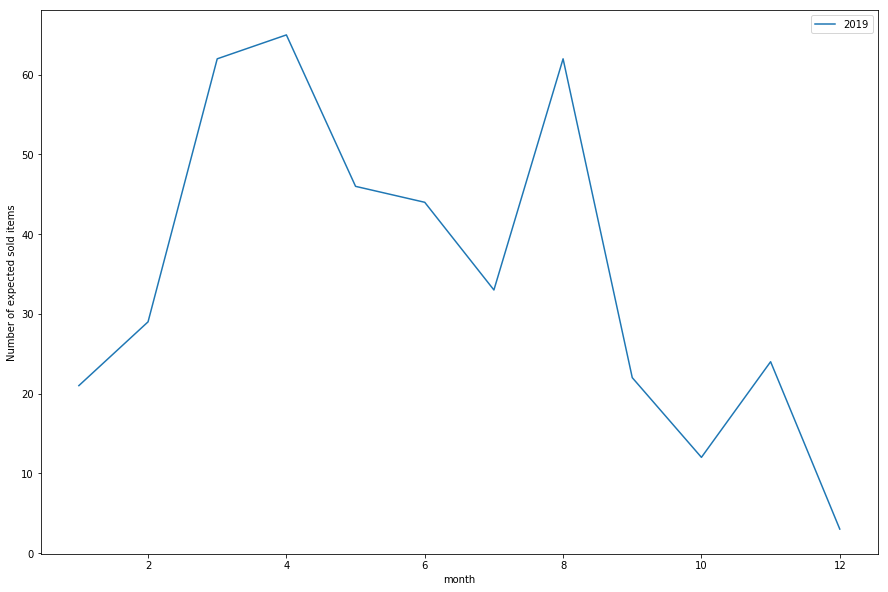

In [5]:
expected_sales="""<p> On the following graph, we can see expected sales for the following year 
                    as forecasted this month. </p>"""

display(HTML(expected_sales))
pivot_sales = pd.pivot_table(df, values='Sales', index='month', columns='year',
                                  aggfunc=np.sum)
pivot_sales = pivot_sales.reset_index()
sales_plot = pivot_sales.plot(x='month', y=pivot_sales.columns[-2], figsize=(15,10))
sales_plot.set_ylabel("Number of expected sold items")
pivot_sales = pivot_sales.set_index('month')

In [7]:
import seaborn as sns

pivot_sales_deltas = pd.DataFrame()
for i in range(len(pivot_sales.columns)-1):
    pivot_sales_deltas[
        str(pivot_sales.columns[i]) + "/" +  str(pivot_sales.columns[i + 1])] = \
        pivot_sales[pivot_sales.columns[i+1]] - pivot_sales[pivot_sales.columns[i]]

sales_diff="""<p> On the following table, we can see expected sales differences with respect to month from year to year.
If the month has already passed, real value is used. </p>"""

display(HTML(sales_diff))

cm = sns.light_palette("green", as_cmap=True)

s = pivot_sales_deltas.style.background_gradient(cmap=cm)
s

,2018/2019,2019/2020
month,,
1,6,-16
2,13,-15
3,44,-26
4,38,-25
5,25,3
6,-5,-37
7,12,19
8,40,3
9,-6,-5


In [8]:
pivot_advertising = pd.pivot_table(df, values='Advertising', columns='year', index='month', aggfunc=np.mean)


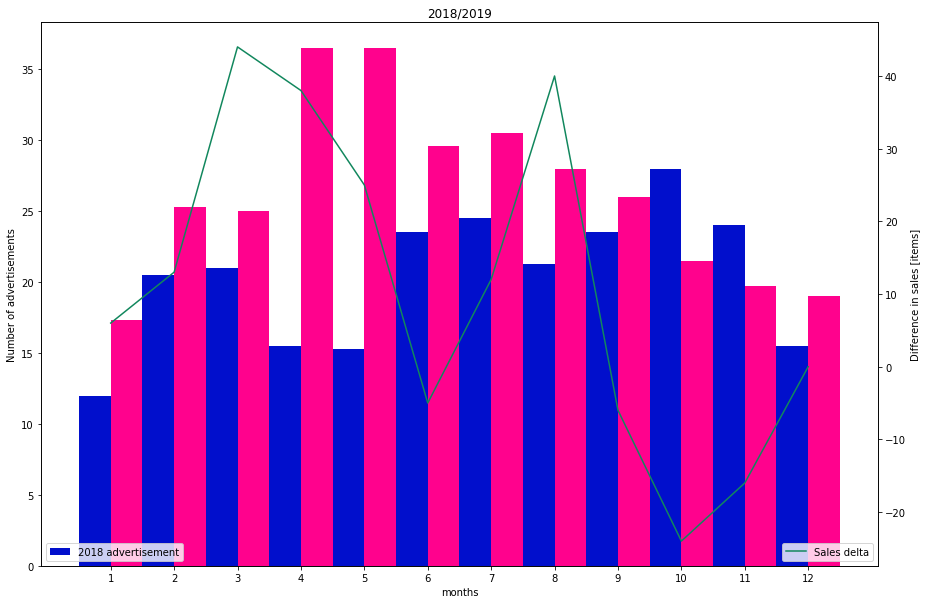

In [9]:
import matplotlib.pyplot as plt
sales_ad_diff="""<p> On the following graph, we can see the number of advertisements as used in the previous and following year
                    and the difference between previous and following year sales. </p>"""

display(HTML(sales_ad_diff))
fig, ax1 = plt.subplots(figsize=(15,10))
pivot_advertising = pivot_advertising.reset_index()
t = pivot_advertising['month']
s1 = pivot_advertising[2018]
ax1.bar(x=t - 0.5, height=s1, width=0.5, color='xkcd:true blue', align='edge');
ax1.tick_params(axis='both', which='major', labelsize=10);
ax1.set_xticks([i for i in t]);
ax1.set_xlabel('months');
ax1.set_ylabel('Number of advertisements');
ax2 = ax1.twinx();
s2 = pivot_sales_deltas['2018/2019']
ax2.plot(t, s2, color='xkcd:dark sea green');
ax2.tick_params(axis='both', which='major', labelsize=10);
ax2.legend(["Sales delta", ], loc='lower right');
ax2.set_ylabel('Difference in sales [items]');
s3 = pivot_advertising[2019]
ax1.legend(["2018 advertisement", "2019 advertisement"], loc='lower left');
ax1.spines['bottom'].set_position('zero');
ax1.set_title('2018/2019');
ax1.bar(t , s3, width=0.5, color='xkcd:hot pink', align='edge');
